# 4. fitting algorithms

The fitting algorithms used to fit your scattering data can have a significant impact on your results. Depending on your system, certain algorithms may lead you to only a local minimum, while others can provide extensive uncertainty analysis of your data. 

There are multiple fitting algorithms available in the `bumps` package and you can read more information about each one at https://bumps.readthedocs.io/en/latest/guide/fitting.html and at https://bumps.readthedocs.io/en/latest/guide/optimizer.html. In this notebook, we provide examples for the Levenberg-Marquardt and DREAM fitting procedures.

In [1]:
from bumps.names import Parameter, inf
from bumps.fitters import fit

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

import sasmodels
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment

import bumps

# uncomment and edit line below to add path to the sasview source code
# sys.path.append("/path/to/sasview/src")
import sas

final chisq 0.4434(35)
=== Uncertainty from curvature:     name value(unc.)     value(unc./chi)) ===
                   incoherent background 0.099965(59)    0.099965(89)   
                                  radius 167.02(21)      167.02(32)     
                                   scale 0.9982(20)      0.9982(30)     


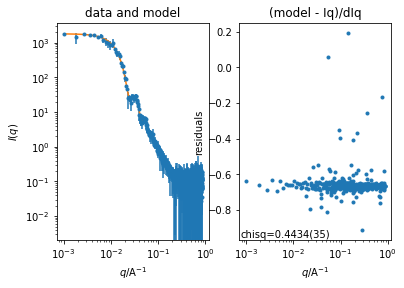

In [2]:
data_np = np.loadtxt('../example_data/sphere_smearing.csv',delimiter=',')
mask = np.where(data_np[:,1]>0)[0] # removing points that may be below zero due to noise
data = sasmodels.data.Data1D(x=data_np[mask,0], y=data_np[mask,1], dy=data_np[mask,2])

kernel = sasmodels.core.load_model("sphere")

scale = Parameter(0.5, name='scale').range(0,1) # setting our fitting range to (0,1)
background = Parameter(0.01, name='incoherent background').range(0,1)

# scattering length densities for our scattering particles and solvent
sld = Parameter(0.728, name='sld')
sld_solvent = Parameter(5.238, name='sld solvent')

radius = Parameter(150, limits=(0,inf), name='radius').range(0,5000)
radius_pd = Parameter(0.05, limits=(0,inf), name='radius')
radius_pd_type = 'lognormal'

model = Model(model=kernel,
             scale=scale,
             background=background,
             sld=sld,
             sld_solvent=sld_solvent,
             radius=radius,
             radius_pd=radius_pd,
             radius_pd_type=radius_pd_type
             )

experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

smearing = sasmodels.resolution.Slit1D(data.x, 0.25)
experiment.resolution = smearing

problem = bumps.fitproblem.FitProblem(experiment)
results = bumps.fitters.fit(problem, method='lm', verbose=True)
problem.plot()

In this example, when we called the `bumps.fitters.fit` function, we specified the 'lm' method which stands for Levenberg-Marquardt, a gradient descent fitting algorithm. This model can be computationally efficient and provide best possible fitting parameters, but it assumes you are close to the desired minimum, i.e. you have to carefully consider starting parameters. For example, if we set the radius in this example to be 1000, the LM model is unable to find the global minimum and gets trapped locally.

final chisq 80.2328(35)
=== Uncertainty from curvature:     name value(unc.)     value(unc./chi)) ===
                   incoherent background 0.093646(59)    0.0936461(66)  
                                  radius 240.62(22)      240.623(25)    
                                   scale 0.9999127925(32) 0.99991279245(36)


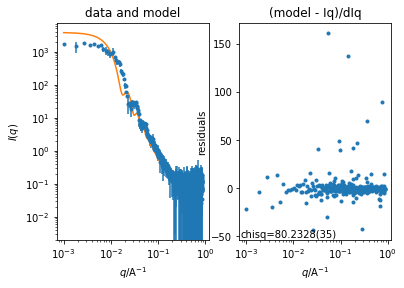

In [3]:
data_np = np.loadtxt('../example_data/sphere_smearing.csv',delimiter=',')
mask = np.where(data_np[:,1]>0)[0] # removing points that may be below zero due to noise
data = sasmodels.data.Data1D(x=data_np[mask,0], y=data_np[mask,1], dy=data_np[mask,2])

kernel = sasmodels.core.load_model("sphere")

scale = Parameter(0.5, name='scale').range(0,1) # setting our fitting range to (0,1)
background = Parameter(0.01, name='incoherent background').range(0,1)

# scattering length densities for our scattering particles and solvent
sld = Parameter(0.728, name='sld')
sld_solvent = Parameter(5.238, name='sld solvent')

radius = Parameter(1000, limits=(0,inf), name='radius').range(0,5000)
radius_pd = Parameter(0.05, limits=(0,inf), name='radius')
radius_pd_type = 'lognormal'

model = Model(model=kernel,
             scale=scale,
             background=background,
             sld=sld,
             sld_solvent=sld_solvent,
             radius=radius,
             radius_pd=radius_pd,
             radius_pd_type=radius_pd_type
             )

experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

smearing = sasmodels.resolution.Slit1D(data.x, 0.25)
experiment.resolution = smearing

problem = bumps.fitproblem.FitProblem(experiment)
results = bumps.fitters.fit(problem, method='lm', verbose=True)
problem.plot()

DREAM is a Markov chain monte carlo fitting algorithm that is less likely to get trapped in local minima, but it is more computationally expensive than LM. We can implement the DREAM method by modifying the arguments of the `fit` function:

# steps: 334, # draws: 10020
step 1 cost 3230.1274(35)
                   incoherent background |.........  0.0100009 in (0,1)
                                  radius .|........       1000 in (0,5000)
                                   scale .....|....        0.5 in (0,1)
step 11 cost 434.9274(35)
step 22 cost 402.5225(35)
step 34 cost 60.9327(35)
step 46 cost 52.2246(35)
step 58 cost 12.6320(35)
step 70 cost 12.6320(35)
step 82 cost 3.4043(35)
step 94 cost 1.4324(35)
step 107 cost 1.4324(35)
step 120 cost 0.6639(35)
step 131 cost 0.5073(35)
step 143 cost 0.5073(35)
step 156 cost 0.5073(35)
step 169 cost 0.4797(35)
step 181 cost 0.4797(35)
step 194 cost 0.4596(35)
step 207 cost 0.4548(35)
step 219 cost 0.4548(35)
step 232 cost 0.4456(35)
step 245 cost 0.4452(35)
step 257 cost 0.4447(35)
step 269 cost 0.4447(35)
step 281 cost 0.4436(35)
step 294 cost 0.4436(35)
step 307 cost 0.4436(35)
step 319 cost 0.4436(35)
step 331 cost 0.4436(35)
step 344 cost 0.4434(35)
                   incoher

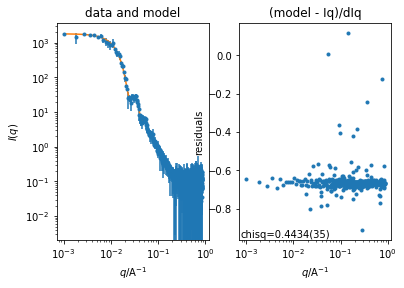

In [5]:
data_np = np.loadtxt('../example_data/sphere_smearing.csv',delimiter=',')
mask = np.where(data_np[:,1]>0)[0] # removing points that may be below zero due to noise
data = sasmodels.data.Data1D(x=data_np[mask,0], y=data_np[mask,1], dy=data_np[mask,2])

kernel = sasmodels.core.load_model("sphere")

scale = Parameter(0.5, name='scale').range(0,1) # setting our fitting range to (0,1)
background = Parameter(0.01, name='incoherent background').range(0,1)

# scattering length densities for our scattering particles and solvent
sld = Parameter(0.728, name='sld')
sld_solvent = Parameter(5.238, name='sld solvent')

radius = Parameter(1000, limits=(0,inf), name='radius').range(0,5000)
radius_pd = Parameter(0.05, limits=(0,inf), name='radius')
radius_pd_type = 'lognormal'

model = Model(model=kernel,
             scale=scale,
             background=background,
             sld=sld,
             sld_solvent=sld_solvent,
             radius=radius,
             radius_pd=radius_pd,
             radius_pd_type=radius_pd_type
             )

experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

smearing = sasmodels.resolution.Slit1D(data.x, 0.25)
experiment.resolution = smearing

problem = bumps.fitproblem.FitProblem(experiment)
results = bumps.fitters.fit(problem, method='dream', verbose=True)
problem.plot()

Here we saw that DREAM was able to overcome the local minimum that trapped the LM model with identical starting conditions. Another benefit of using a DREAM approach is that it provides an uncertainty analysis of the parameters.

              Parameter       mean  median    best [   68% interval] [   95% interval]
 1 incoherent background 0.0999(11) 0.09997 0.09996 [ 0.0997  0.1001] [ 0.0974  0.1018]
 2               radius  165.3(83)  166.85  167.03 [  164.4   167.2] [  154.2   170.6]
 3                scale  0.981(54)   0.996   0.998 [   0.97    1.00] [   0.90    1.00]


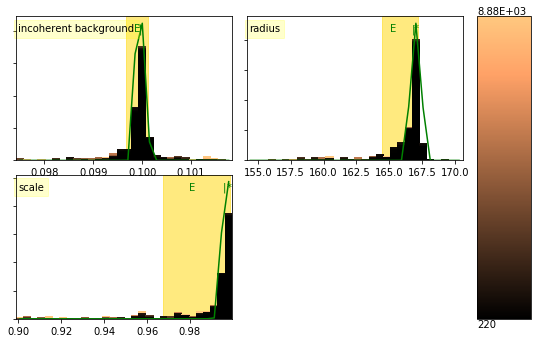

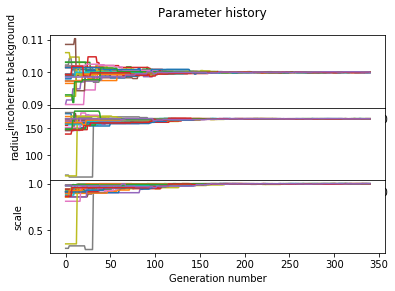

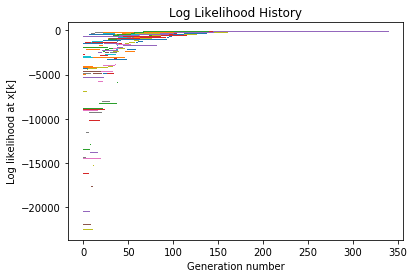

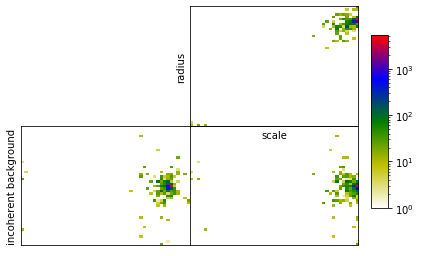

In [6]:
results.state.show()

The analysis provides information about the history of the parameters as the fits proceeds and the distribution of the draws for each of the parameters. Ideally, these histograms and correlation plots will provide information about the confidence in each result. Additionally, it could uncover systems were there were perhaps unexpected correlations between two parameters or a multi-modal distributions of parameters that each provide a suitable 'fit' to the data. These plots can help reserachers narrow down fitting ranges or uncover complexity in their system that may not be well understood using a more common fitting procedure. To read more about the details of these plots, please see the following documentation at https://bumps.readthedocs.io/en/latest/guide/optimizer.html#fit-dream.

A json file of the fitting parameter results and these uncertainty plots can be saved to a local directory by uncommenting the following cell and modifying the file path and base name as needed:

In [7]:
#results.state.show(figfile='/path/to/save/location/base_file_name')